In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print("Shape of training images:", train_images.shape)
print("Shape of testing images:",test_images.shape)
print("Length of training labels:", len(train_labels))
print("Length of testing labels:", len(test_labels))


Shape of training images: (60000, 28, 28)
Shape of testing images: (10000, 28, 28)
Length of training labels: 60000
Length of testing labels: 10000


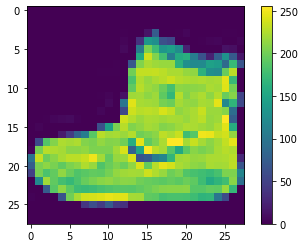

In [7]:
# preprocess images
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
